In [7]:
import cv2
import math
import time
import matplotlib.pyplot as plt

In [8]:
# import argparse
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv2.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

# define the path of the face detection, age detection, and gender detection models
faceProto = "opencv_face_detector.pbtxt"
faceModel = "opencv_face_detector_uint8.pb"
ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"
genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"

# define the list of age buckets and gender that our age detector will predict.
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load the face detection, age detection, and gender detection models
ageNet = cv2.dnn.readNet(ageModel, ageProto)
genderNet = cv2.dnn.readNet(genderModel, genderProto)
faceNet = cv2.dnn.readNet(faceModel, faceProto)
padding = 20

In [9]:
def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        # print("Gender Output : {}".format(genderPreds))
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print("Age Output : {}".format(agePreds))
        print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

        label = "{},{}".format(gender, age)
        cv2.putText(frameFace, label, (bbox[0], bbox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)
    return frameFace

Gender : Female, conf = 0.996
Age Output : [[1.35107375e-05 3.61038052e-04 2.35480845e-01 1.07363202e-01
  6.53517067e-01 2.32376670e-03 7.41978147e-05 8.66423070e-04]]
Age : (25-32), conf = 0.654


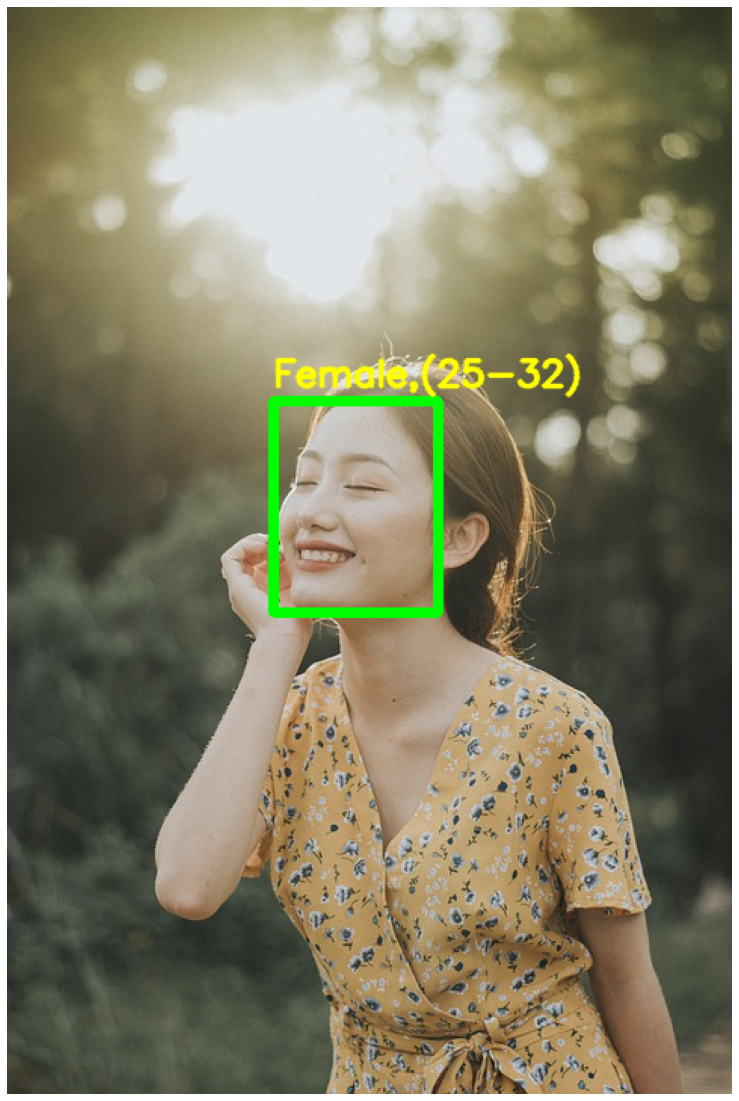

In [11]:
# Read the image
input = cv2.imread("girl1.jpg")
output = age_gender_detector(input)

# Convert BGR to RGB for proper color display in Matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the output image using Matplotlib
plt.figure(figsize=(20,20))
plt.imshow(output_rgb)
plt.axis('off')  # Hide axes
plt.show()

Gender : Male, conf = 0.997
Age Output : [[3.4828605e-05 7.1957388e-06 1.6768652e-04 1.0404467e-04 1.0569711e-01
  7.7629471e-01 9.8762333e-02 1.8931994e-02]]
Age : (38-43), conf = 0.776


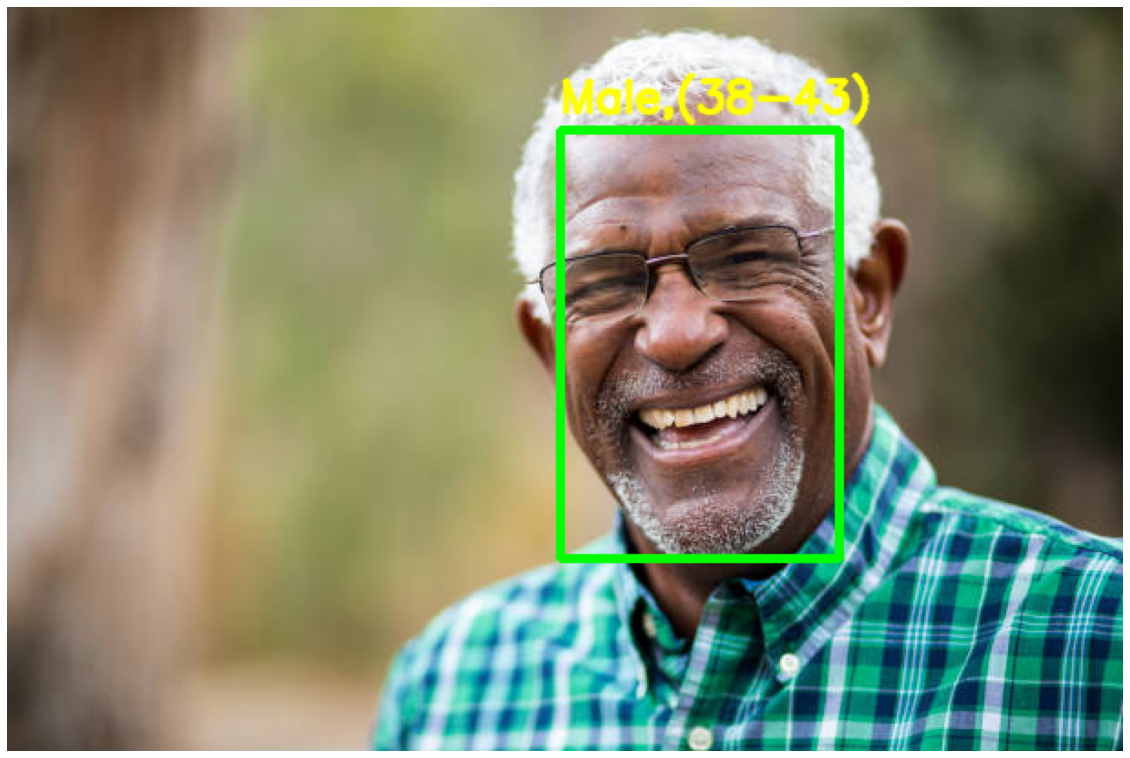

In [12]:
# Read the image
input = cv2.imread("man1.jpg")
output = age_gender_detector(input)

# Convert BGR to RGB for proper color display in Matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the output image using Matplotlib
plt.figure(figsize=(20,20))
plt.imshow(output_rgb)
plt.axis('off')  # Hide axes
plt.show()

Gender : Male, conf = 1.000
Age Output : [[4.4740709e-08 4.0934756e-06 2.6050973e-04 7.9248637e-02 9.2047590e-01
  1.0143195e-05 3.2098495e-07 3.9736119e-07]]
Age : (25-32), conf = 0.920


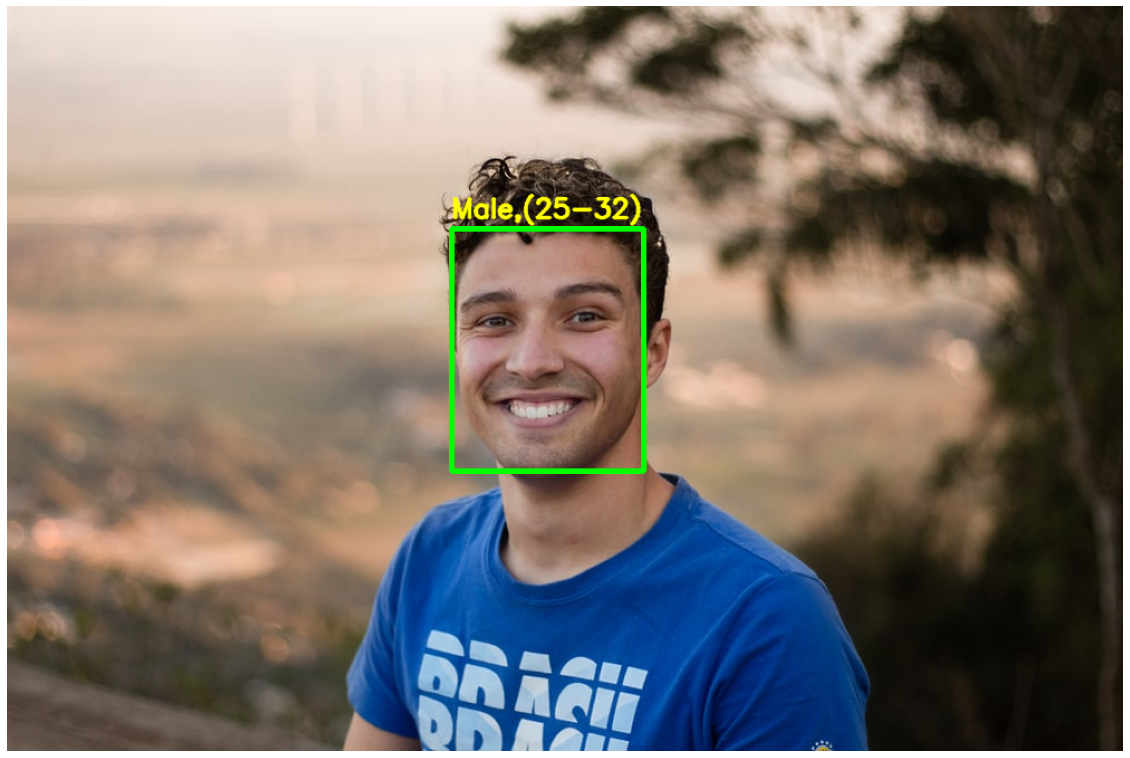

In [13]:
# Read the image
input = cv2.imread("man2.jpg")
output = age_gender_detector(input)

# Convert BGR to RGB for proper color display in Matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the output image using Matplotlib
plt.figure(figsize=(20,20))
plt.imshow(output_rgb)
plt.axis('off')  # Hide axes
plt.show()

Gender : Male, conf = 1.000
Age Output : [[6.4720534e-02 9.2762280e-01 3.8744169e-03 1.5721128e-04 3.5589233e-03
  3.5552748e-05 2.4844969e-05 5.7227244e-06]]
Age : (4-6), conf = 0.928


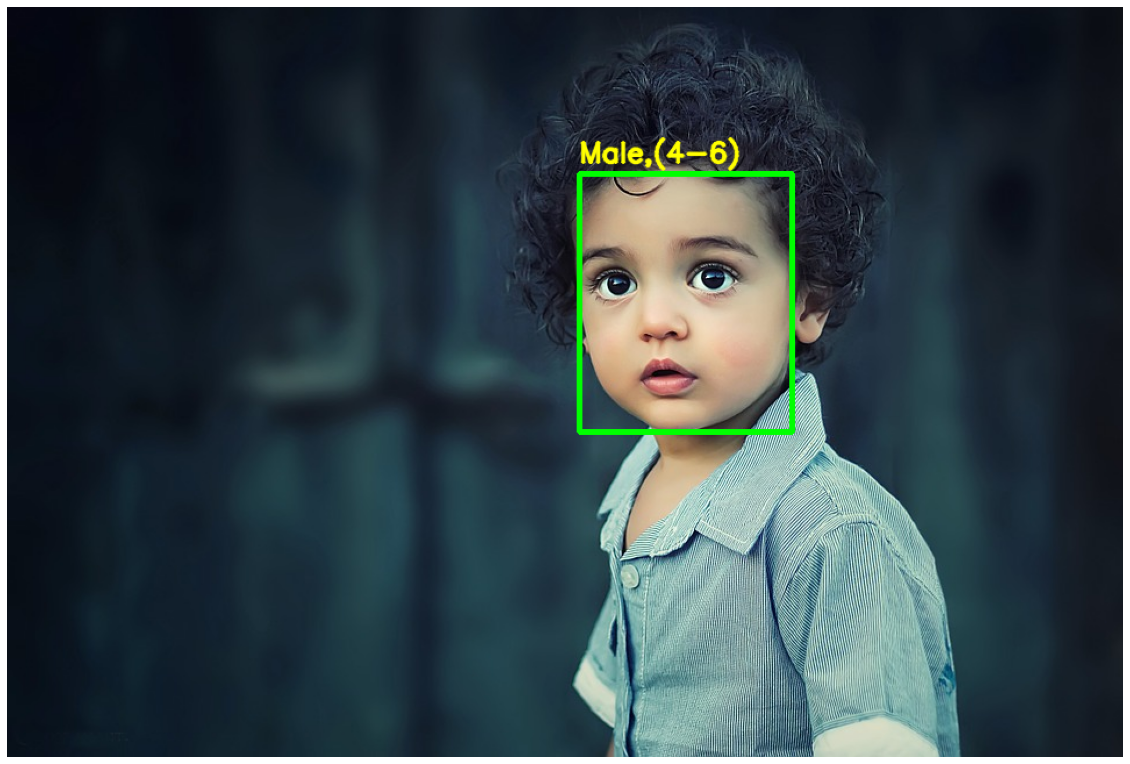

In [14]:
# Read the image
input = cv2.imread("kid1.jpg")
output = age_gender_detector(input)

# Convert BGR to RGB for proper color display in Matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the output image using Matplotlib
plt.figure(figsize=(20,20))
plt.imshow(output_rgb)
plt.axis('off')  # Hide axes
plt.show()

Gender : Female, conf = 0.893
Age Output : [[6.2034018e-03 9.9146867e-01 2.2966645e-03 4.2972370e-06 2.3988368e-05
  1.5087223e-06 1.1106123e-06 2.8587181e-07]]
Age : (4-6), conf = 0.991


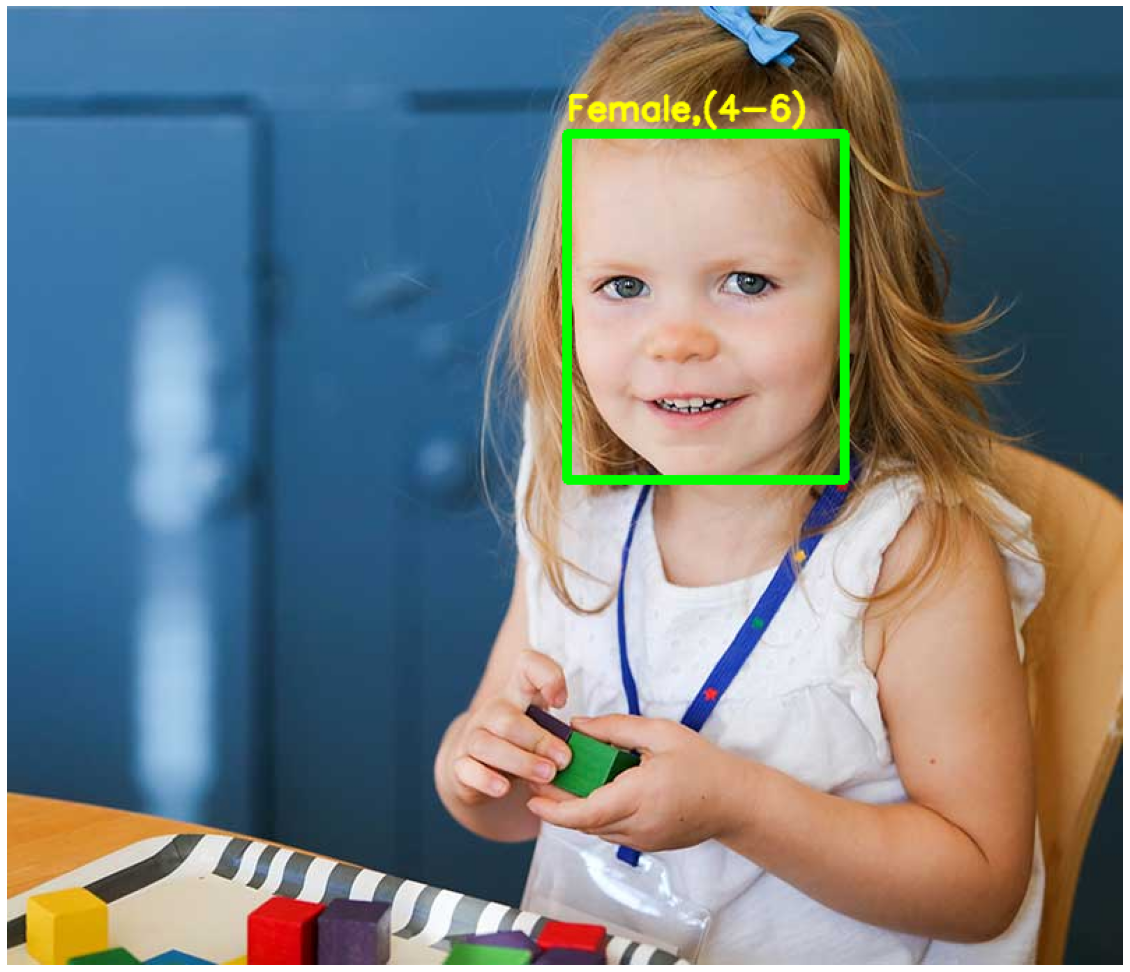

In [15]:
# Read the image
input = cv2.imread("kid2.jpg")
output = age_gender_detector(input)

# Convert BGR to RGB for proper color display in Matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the output image using Matplotlib
plt.figure(figsize=(20,20))
plt.imshow(output_rgb)
plt.axis('off')  # Hide axes
plt.show()

Gender : Female, conf = 0.997
Age Output : [[4.4483039e-07 1.5139211e-07 3.2148837e-05 3.7945596e-05 3.5415363e-02
  9.6312368e-01 7.8832172e-04 6.0199073e-04]]
Age : (38-43), conf = 0.963


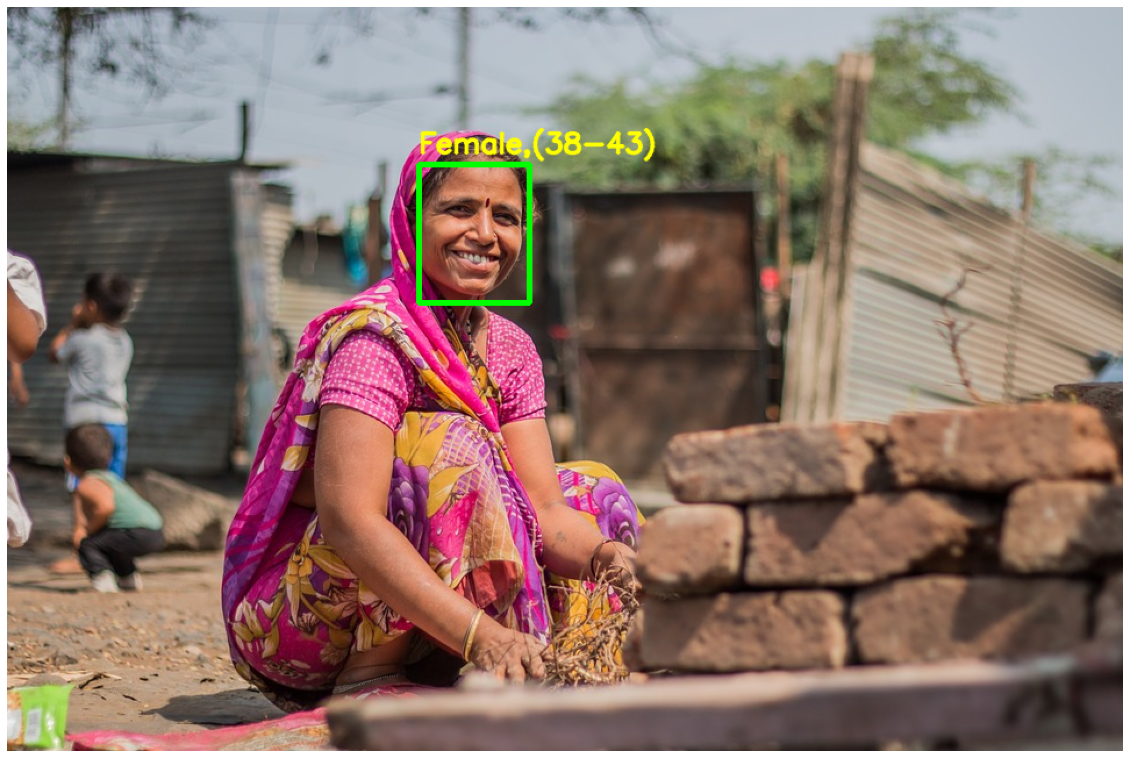

In [16]:
# Read the image
input = cv2.imread("woman1.jpg")
output = age_gender_detector(input)

# Convert BGR to RGB for proper color display in Matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the output image using Matplotlib
plt.figure(figsize=(20,20))
plt.imshow(output_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [17]:
# Initialize webcam
webcam = cv2.VideoCapture(0)

# Start webcam capture loop
while True:
    # Read a frame from the webcam
    ret, frame = webcam.read()
    
    if not ret:
        break

    # Detect age and gender in the frame
    output = age_gender_detector(frame)

    # Display the output frame
    cv2.imshow('Age and Gender Detector', output)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
webcam.release()
cv2.destroyAllWindows()

Gender : Female, conf = 0.760
Age Output : [[0.0115582  0.6892497  0.24548917 0.00812652 0.03558466 0.00709112
  0.00119925 0.00170139]]
Age : (4-6), conf = 0.689
Gender : Male, conf = 0.995
Age Output : [[6.9848676e-03 9.8299730e-01 9.7191054e-03 6.1602565e-05 1.7970103e-04
  4.0446288e-05 6.0934976e-06 1.0911540e-05]]
Age : (4-6), conf = 0.983
Gender : Male, conf = 0.999
Age Output : [[4.3749642e-02 8.7440938e-01 8.0631644e-02 5.5557041e-04 4.5917821e-04
  1.3286920e-04 1.3016682e-05 4.8645186e-05]]
Age : (4-6), conf = 0.874
Gender : Male, conf = 0.999
Age Output : [[7.9451695e-02 9.0404224e-01 1.6063625e-02 1.5648866e-04 1.7661469e-04
  6.7115594e-05 8.9632140e-06 3.3169290e-05]]
Age : (4-6), conf = 0.904
Gender : Male, conf = 0.999
Age Output : [[1.5074433e-01 7.9603869e-01 5.0986595e-02 5.2088493e-04 1.1005072e-03
  4.1964292e-04 7.0126865e-05 1.1928548e-04]]
Age : (4-6), conf = 0.796
Gender : Male, conf = 1.000
Age Output : [[4.5709160e-01 5.2499551e-01 1.7182481e-02 2.2651022e-0

Gender : Male, conf = 0.994
Age Output : [[3.2143907e-06 2.7714765e-05 2.7110305e-01 1.3961952e-02 6.3632780e-01
  7.7961646e-02 5.6511885e-04 4.9595314e-05]]
Age : (25-32), conf = 0.636
Gender : Male, conf = 1.000
Age Output : [[1.3067423e-05 1.6849443e-05 3.1319107e-03 5.6385607e-02 8.6632037e-01
  7.1427122e-02 2.5965131e-03 1.0842593e-04]]
Age : (25-32), conf = 0.866
Gender : Male, conf = 1.000
Age Output : [[3.8503353e-05 4.4302931e-05 7.7413716e-03 7.5798668e-02 7.6172698e-01
  1.4768702e-01 6.5052845e-03 4.5794318e-04]]
Age : (25-32), conf = 0.762
Gender : Male, conf = 1.000
Age Output : [[1.8261544e-05 2.7948250e-05 6.5940861e-03 7.3269144e-02 8.7843627e-01
  3.8154136e-02 3.3191396e-03 1.8098527e-04]]
Age : (25-32), conf = 0.878
Gender : Male, conf = 1.000
Age Output : [[1.9387101e-06 8.5259171e-06 1.4154078e-02 8.2553916e-02 9.0021032e-01
  2.4616481e-03 5.8791728e-04 2.1678539e-05]]
Age : (25-32), conf = 0.900
Gender : Male, conf = 1.000
Age Output : [[1.9387101e-06 8.525917

Gender : Male, conf = 1.000
Age Output : [[4.6834188e-08 2.2115196e-07 1.3338463e-02 3.3914191e-03 8.9124173e-01
  9.2011742e-02 1.0029644e-05 6.3180623e-06]]
Age : (25-32), conf = 0.891
Gender : Male, conf = 1.000
Age Output : [[4.77782116e-08 5.51918049e-07 3.15307565e-02 5.74667240e-03
  8.49553049e-01 1.13147736e-01 1.06240968e-05 1.06469588e-05]]
Age : (25-32), conf = 0.850
Gender : Male, conf = 1.000
Age Output : [[2.65355045e-08 1.10750136e-07 8.55182670e-03 3.26157291e-03
  9.37619507e-01 5.05548306e-02 6.04433126e-06 6.09471272e-06]]
Age : (25-32), conf = 0.938
Gender : Male, conf = 1.000
Age Output : [[5.3652141e-08 1.2221581e-07 5.6213886e-03 2.6653484e-03 9.1719413e-01
  7.4504197e-02 7.7922241e-06 7.0798478e-06]]
Age : (25-32), conf = 0.917
Gender : Male, conf = 1.000
Age Output : [[7.4916237e-08 1.7445809e-07 7.5930213e-03 2.7195623e-03 9.0451562e-01
  8.5153051e-02 1.0092269e-05 8.4546955e-06]]
Age : (25-32), conf = 0.905
Gender : Male, conf = 1.000
Age Output : [[6.4666

Gender : Male, conf = 1.000
Age Output : [[3.4150162e-07 4.7864510e-06 8.6693801e-02 4.3694478e-02 7.1643943e-01
  1.5311277e-01 2.6282585e-05 2.8097858e-05]]
Age : (25-32), conf = 0.716
Gender : Male, conf = 1.000
Age Output : [[4.3036792e-07 4.6938458e-06 5.9137717e-02 3.5703775e-02 6.4001900e-01
  2.6505846e-01 3.7562531e-05 3.8364440e-05]]
Age : (25-32), conf = 0.640
Gender : Male, conf = 1.000
Age Output : [[3.0206593e-07 4.1413455e-06 1.6053662e-01 4.6922754e-02 5.4623061e-01
  2.4623936e-01 3.1926895e-05 3.4301425e-05]]
Age : (25-32), conf = 0.546
Gender : Male, conf = 1.000
Age Output : [[6.7425515e-07 9.3696226e-06 8.8965587e-02 1.2130219e-01 5.2195209e-01
  2.6761907e-01 1.0546356e-04 4.5596418e-05]]
Age : (25-32), conf = 0.522
Gender : Male, conf = 1.000
Age Output : [[2.2047961e-06 9.4544057e-06 7.2793543e-02 9.8255187e-02 3.7404978e-01
  4.5449933e-01 2.4001740e-04 1.5050855e-04]]
Age : (38-43), conf = 0.454
Gender : Male, conf = 1.000
Age Output : [[1.4776197e-06 1.323548

Gender : Male, conf = 0.690
Age Output : [[1.2120133e-05 1.8069049e-04 4.9861260e-02 1.2811769e-03 9.3816847e-01
  7.6943305e-03 2.3817143e-03 4.2034462e-04]]
Age : (25-32), conf = 0.938
Gender : Male, conf = 0.816
Age Output : [[4.0351559e-05 1.5667798e-04 1.4646593e-01 3.0764965e-03 8.1852192e-01
  2.6425932e-02 3.7153612e-03 1.5973254e-03]]
Age : (25-32), conf = 0.819
Gender : Male, conf = 0.770
Age Output : [[1.8586896e-05 9.8265715e-05 1.2111213e-01 2.1241908e-03 8.5006541e-01
  2.1159194e-02 3.6447088e-03 1.7775932e-03]]
Age : (25-32), conf = 0.850
Gender : Male, conf = 0.712
Age Output : [[1.0377232e-05 1.5822936e-05 5.2626156e-03 1.2473342e-03 9.4706494e-01
  4.2140875e-02 2.0844310e-03 2.1736186e-03]]
Age : (25-32), conf = 0.947
Gender : Male, conf = 0.712
Age Output : [[1.0377232e-05 1.5822936e-05 5.2626156e-03 1.2473342e-03 9.4706494e-01
  4.2140875e-02 2.0844310e-03 2.1736186e-03]]
Age : (25-32), conf = 0.947
Gender : Male, conf = 0.733
Age Output : [[2.8617833e-05 9.042560

Age Output : [[0.29247394 0.1435509  0.2227111  0.19419152 0.12317989 0.02089347
  0.00190452 0.00109472]]
Age : (0-2), conf = 0.292
Gender : Male, conf = 1.000
Age Output : [[0.53389615 0.14779377 0.09702076 0.07201298 0.11675216 0.02640474
  0.00463436 0.00148513]]
Age : (0-2), conf = 0.534
Gender : Male, conf = 1.000
Age Output : [[0.53389615 0.14779377 0.09702076 0.07201298 0.11675216 0.02640474
  0.00463436 0.00148513]]
Age : (0-2), conf = 0.534
